# Tutorial: Discover Relationships in SYNTHEA dataset Using Semantic Link

In this tutorial we illustrate relationship detection in the public SYNTHEA dataset with the help of Semantic Link. 

When starting without an existing data model or dealing with new data for the first time, it can be helpful to discover relationships automatically and set the stage for:

   * Understanding the model at high level and further exploratory data analysis,
   * Validation of updated data or new incoming data,
   * Data cleaning.

Even if relationships are known in advance, a relationships search can help with better understanding of the model or identification of data quality issues. 

We will start from a simple baseline example where we experiment with only 3 tables so that connections between them are easy to follow. Then we will show a more complex example with a larger table set.

### In this tutorial, you learn how to: 
- Use components of Semantic Link's Python library (SemPy) that supports integration with Power BI and helps to automate data  analysis. These components include:
    - FabricDataFrame - a pandas-like structure enhanced with additional semantic information;
    - Functions for pulling Power BI datasets from a Fabric workspace into your notebook;
    - Functions that automate the discovery and visualization of relationships in your datasets.
- Troubleshoot the process of relationship discovery for datasets with multiple tables and interdependencies.

### Prerequisites

* A [Microsoft Fabric subscription](https://learn.microsoft.com/fabric/enterprise/licenses). Or sign up for a free [Microsoft Fabric (Preview) trial](https://learn.microsoft.com/fabric/get-started/fabric-trial).
* Sign in to [Microsoft Fabric](https://fabric.microsoft.com/).
* Go to the Data Science experience in Microsoft Fabric.
* Select **Workspaces** from the left navigation pane to find and select your workspace. This workspace becomes your current workspace.
* Download the _Customer Profitability Sample.pbix_ and _'Customer Profitability Sample PBIX (auto)_ datasets from the [fabric-samples GitHub repository](https://github.com/microsoft/fabric-samples/blob/09cb40f1ffe0a7cfec67ec0ba2fcfdc95ba750a8/docs-samples/data-science/datasets/Customer%20Profitability%20Sample.pbix) and upload them to your workspace.
* Open your notebook. You have two options:
    * [Import this notebook into your workspace](https://learn.microsoft.com/en-us/fabric/data-engineering/how-to-use-notebook#import-existing-notebooks). You can import from the Data Science homepage.
    * Alternatively, you can create [a new notebook](https://learn.microsoft.com/fabric/data-engineering/how-to-use-notebook#create-notebooks) to copy/paste code into cells.
* In the Lakehouse explorer section of your notebook, add a new or existing lakehouse to your notebook. For more information on how to add a lakehouse, see [Attach a lakehouse to your notebook](https://learn.microsoft.com/en-us/fabric/data-science/tutorial-data-science-prepare-system#attach-a-lakehouse-to-the-notebooks).

## Set up the notebook

In this section, you'll set up a notebook environment with the necessary modules and data.

First, install `SemPy` from PyPI using pip magic command:

In [1]:
%pip install semantic-link

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, -1, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 150.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 148.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.2 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.5/284.5 kB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 95.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 140.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 131.2 MB/s eta 0:00:

Then, perform necessary imports of SemPy modules as well as pandas that will be needed later on:

In [2]:
import pandas as pd

from sempy.samples import download_synthea
from sempy.relationships import (
    find_relationships,
    list_relationship_violations,
    plot_relationship_metadata
)

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 9, Finished, Available)

Also import pandas for enforcing a configuration option that will help with output formatting:

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 10, Finished, Available)

Lastly, pull the sample data - for this tutorial, you'll use the SYNTHEA dataset of synthetic medical records (small version for simplicity):

In [4]:
download_synthea(which='small')

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 11, Finished, Available)

'abfss://1895b289-58e6-4ccb-8548-b5ef3dc312b3@msit-onelake.dfs.fabric.microsoft.com/11631641-5456-4f90-90b3-431e0cf03650/Files/synthea/csv'

## Detect Relationships on a Small Subset of SYNTHEA Tables

Select 3 tables from a larger set. The practical meaning of these tables is that 'encounters' (e.g. a medical appointment, procedure) specifies the 'patients' that these encounters were for, as well as the 'providers' who attended the patients. In other words 'encounters' resolves a many-to-many relationship between 'patients' and 'providers' and can be thought of as an [Associative Entity](https://wikipedia.org/wiki/Associative_entity):

In [5]:
patients = pd.read_csv('synthea/csv/patients.csv')
providers = pd.read_csv('synthea/csv/providers.csv')
encounters = pd.read_csv('synthea/csv/encounters.csv')

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 12, Finished, Available)

Find relationships between the tables using  SemPy's ``find_relationships`` function:

In [6]:
suggested_relationships = find_relationships([patients, providers, encounters])
suggested_relationships

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 13, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To
0,m:1,encounters,PATIENT,patients,Id,1.0,1.000000,0,0,1171,1171,53346,1171
1,m:1,encounters,PROVIDER,providers,Id,1.0,0.188557,0,0,1104,5855,53346,5855


We can visualize the relationships dataframe as a graph with another function from SemPy library called ``plot_relationship_metadata``. The function lays out the hierarchy from left to right, which corresponds to "from" and "to" tables in our detection output. In other words, the independent "from" tables on the left point with their foreign keys to their "to" dependency tables on the right. Each entity box shows columns that participate on either "from" or "to" side of a relationship.

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 14, Finished, Available)

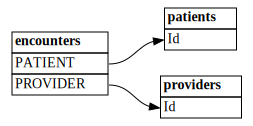

In [7]:
plot_relationship_metadata(suggested_relationships)

By default, relationships are generated as "m:1" (not as "1:m") or "1:1". The "1:1" relationships can be generated one or both ways, depending if the ratio of mapped values to all values exceed coverage_threshold in just one or both directions. Later in this notebook, we will discuss the less frequent case of "m:m" relationships.

## Troubleshoot Relationship Detection Issues

The baseline example shows a successful relationship detection on clean SYNTHEA data. In practice, the data is rarely clean, which will prevent successful detection. There are several techniques that can help us in this situation. To understand them, in this part of the tutorial we create a dataset by manipulating original dataframes to obtain "dirty" data.

In [8]:
# create a dirty 'patients' dataframe by dropping some rows using head() and duplicate some using concat()
patients_dirty = pd.concat([patients.head(1000), patients.head(50)], axis=0)

# create a dirty 'providers' dataframe by dropping some rows using head()
providers_dirty = providers.head(5000)

# the dirty dataframes have less records than the clean ones
print(len(patients_dirty))
print(len(providers_dirty)) 

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 15, Finished, Available)

1050
5000


For comparison, print sizes of the original tables:

In [9]:
print(len(patients))
print(len(providers))

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 16, Finished, Available)

1171
5855


Find relationships between the tables using  SemPy's ``find_relationships`` function:

In [10]:
find_relationships([patients_dirty, providers_dirty, encounters])

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 17, Finished, Available)

No relationships found


,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To


As you can see above, no relationships have been detected due to the errors that we had introduced earlier.

### Use Validation

Validation is the best tool for troubleshooting detection failures because:

   * it will report clearly why a particular relationship does not follow the Foreign Key rules and therefore cannot be detected
   * it runs very fast with large datasets because it focuses only on the declared relationships and does not perform search

Validation can use any dataframe with columns similar to the one generated by `find_relationships`. Our `suggested_realtionship` dataframe refers to 'patients' rather than 'patients_dirty' but we can alias the dataframes with a dictionary:

In [11]:
dirty_tables = {
    "patients": patients_dirty,
    "providers" : providers_dirty,
    "encounters": encounters
}

errors = list_relationship_violations(dirty_tables, suggested_relationships)
errors

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 18, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Type,Message
0,m:1,encounters,PATIENT,patients,Id,target not PK,patients[Id] not unique
1,m:1,encounters,PATIENT,patients,Id,partial join,"171 out of 1171 values in encounters[PATIENT] not present in patients[Id]: 19d2cfb8-439b-454a-b47e-5274c219005b,278c5ad9-1e68-45f5-b274-0bdbb60569be,3727f482-9fc1-4d26-8778-01b1b745e037,80a7bc09-bbee-476b-9b3f-e44984c96ca1,13c98b78-98e9-41fb-a29a-686d005d98f7,1e52e4fe-13c7-41ad-8b3e-5933fdd553c4,c868a615-b3a7-44c6-ad66-d06b2909d689,0e297a18-1dcc-43a3-b78a-0ca8d07e59bc,92b4bd25-f752-49fe-b248-a3e4b0e89d2a,f290b494-c6de-40ee-98a3-ebb9d43cfd70,..."
2,m:1,encounters,PROVIDER,providers,Id,partial join,"210 out of 1104 values in encounters[PROVIDER] not present in providers[Id]: e755f853-29a9-3772-b889-589c1c172021,08703819-4d5c-3998-9de3-6ef611285bbc,51850f28-6e0a-374f-a50a-948ebf407226,93f77048-5bfd-3a59-9ae4-4399fbd77398,18cc4159-3360-38cf-8ce2-839fb21bedbd,ef6360ac-7d6f-3204-bd31-e1e63fcb0f41,e4cac565-c0a3-3bd1-b0d3-741c3c47881a,c2448f94-4dfd-3330-b9f8-cb975ab790c3,40371261-c4fb-3fba-b3d1-60f47aa0e68f,b274d84c-d063-3cec-a8f1-f85c9bf03bb9,..."


### Loosen Search Criteria

In more murky scenarios, you can try loosening search criteria. This method increases the posibility of false positives. First, set ``include_many_to_many=True`` and evaluate if it helps:

In [14]:
find_relationships(dirty_tables, include_many_to_many=True, coverage_threshold=1)

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 21, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To
0,m:m,providers,GENDER,patients,GENDER,1.0,1.000000,0,0,2,2,5000,1050
1,m:m,patients,GENDER,providers,GENDER,1.0,1.000000,0,0,2,2,1050,5000
2,m:m,patients,Id,encounters,PATIENT,1.0,0.853971,0,0,1000,1171,1050,53346


The results above detect the relationship from 'encounters' to 'patients', but there are two problems:

   * The relationship indicates a direction from 'patients' to 'encounters' which is an inverse of the expected. This is because all
     'patients' happened to be covered by 'encounters' (coverage_from is 1.0) while 'encounters' are only partially covered
     by 'patients' (coverage_to = 0.85), since patients rows are missing.
   * There is an accidental match on a low cardinality 'GENDER' column, which happens to match by name and value in both tables,
     but it is not an "m:1" relationship that we are interested in. The low cardinality is indicated by 'n_unique_from' and
     'n_unique_to' columns.

Rerun ``find_relationships`` to look only for "m:1" relationships, but with a lower ``coverage_threshold=0.5``:

In [15]:
find_relationships(dirty_tables, include_many_to_many=False, coverage_threshold=0.5)

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 22, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To
0,m:1,encounters,PROVIDER,providers,Id,0.809783,0.1788,0,0,1104,5000,53346,5000


The results above show the correct direction of the relationships from 'encounters' to 'providers'. However, the relationship from 'encounters' to 'patients' is not detected, because 'patients' is not unique, so it cannot be on the "One" side of "m:1" relationship.
     
Loosen both ``include_many_to_many=True`` and ``coverage_threshold=0.5``:

In [16]:
find_relationships(dirty_tables, include_many_to_many=True, coverage_threshold=0.5)

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 23, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To
0,m:m,providers,GENDER,patients,GENDER,1.000000,1.000000,0,0,2,2,5000,1050
1,m:m,patients,GENDER,providers,GENDER,1.000000,1.000000,0,0,2,2,1050,5000
2,m:m,encounters,PATIENT,patients,Id,0.853971,1.000000,0,0,1171,1000,53346,1050
3,m:m,patients,Id,encounters,PATIENT,1.000000,0.853971,0,0,1000,1171,1050,53346
4,m:1,encounters,PROVIDER,providers,Id,0.809783,0.178800,0,0,1104,5000,53346,5000
5,m:m,encounters,ORGANIZATION,providers,ORGANIZATION,0.811423,0.986770,0,0,1103,907,53346,5000
6,m:m,providers,ORGANIZATION,encounters,ORGANIZATION,0.986770,0.811423,0,0,907,1103,5000,53346


Now we are seeing both relationships of interest, but there is a lot more noise:

   * The low cardinality match on 'GENDER' is present
   * A higher cardinality "m:m" match on 'ORGANIZATION' appeared. This makes it apparent that the 'ORGANIZATION' is likely
     a column denormalized to both tables.

### Match Column Names

By default, SemPy will consider as matches only attributes that show name similarity, taking advantage of the fact that
database designers usually name related columns the same way. This helps to avoid spurious relationships, which occur most frequently with low cardinality integer keys. For example, if there are 1,2,3...10 product categories and 1,2,3...10 order status codes they will be confused with each other when only looking at value mappings without taking column names into account. Spurious relationships
should not be a problem with GUID like keys.

SemPy looks at a similarity between column names and table names. The matching is approximate and case insensitive. It ignores the most frequently encountered "decorator" substrings such as "id", "code", "name", "key", "pk", "fk". As a result the most typical match cases are:

   * an attribute 'column' in entity 'foo' will matched with an attribute called 'column'
     (also 'COLUMN' or 'Column') in 'bar'.
   * an attribute 'column' in entity 'foo' will be matched with an attribute called 'column_id' in 'bar'.
   * an attribute 'bar' in entity 'foo' will be matched with an attribute called 'code' in 'bar'

As a positive side effect, matching columns name first helps the detection run faster.

To understand which columns are selected for further evaluation, use ``verbose=2`` option
(``verbose=1`` lists only the entities being processed).

``name_similarity_threshold`` parameter determines how columns will be compared. The threshold of 1 indicates that we are interested in 100% match only:

In [17]:
find_relationships(dirty_tables, verbose=2, name_similarity_threshold=1.0);

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 24, Finished, Available)

Searching for relationships between tables patients and providers
  Columns GENDER and GENDER
  Columns ADDRESS and ADDRESS
  Columns CITY and CITY
  Columns STATE and STATE
  Columns ZIP and ZIP
  Columns LAT and LAT
  Columns LON and LON
Searching for relationships between tables patients and encounters
Searching for relationships between tables providers and encounters
  Columns ORGANIZATION and ORGANIZATION
No relationships found


Running at 100% similarity fails to account for small differences between names. In our example, the tables have a plural form with "s" suffix, which results in no exact match. This is handled very well with our default ``name_similarity_threshold=0.8``. Notice that the Id for plural form 'patients' is now compared to singular 'patient' without adding too many other spurious comparisons to our execution time:

In [24]:
find_relationships(dirty_tables, verbose=2, name_similarity_threshold=0.8);

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 31, Finished, Available)

Searching for relationships between tables patients and providers
  Columns LAST and LAT
  Columns GENDER and GENDER
  Columns ADDRESS and ADDRESS
  Columns CITY and CITY
  Columns STATE and STATE
  Columns ZIP and ZIP
  Columns LAT and LAT
  Columns LON and LON
Searching for relationships between tables patients and encounters
  Columns Id and PATIENT
  Columns STATE and START
Searching for relationships between tables providers and encounters
  Columns Id and PROVIDER
  Columns ORGANIZATION and ORGANIZATION
  Columns NAME and PROVIDER
  Columns STATE and START
No relationships found


Changing ``name_similarity_threshold`` to 0 is the other extreme, and it indicates that we want to compare all columns. This is rarely necessary and will result in increased execution time and spurious matches that will need to be reviewed. Observe the amount of comparisons in the verbose output:

In [19]:
find_relationships(dirty_tables, verbose=2, name_similarity_threshold=0);

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 26, Finished, Available)

Searching for relationships between tables patients and providers
  Columns Id and Id
  Columns Id and ORGANIZATION
  Columns Id and NAME
  Columns Id and GENDER
  Columns Id and SPECIALITY
  Columns Id and ADDRESS
  Columns Id and CITY
  Columns Id and STATE
  Columns Id and ZIP
  Columns Id and LAT
  Columns Id and LON
  Columns Id and UTILIZATION
  Columns BIRTHDATE and Id
  Columns BIRTHDATE and ORGANIZATION
  Columns BIRTHDATE and NAME
  Columns BIRTHDATE and GENDER
  Columns BIRTHDATE and SPECIALITY
  Columns BIRTHDATE and ADDRESS
  Columns BIRTHDATE and CITY
  Columns BIRTHDATE and STATE
  Columns BIRTHDATE and ZIP
  Columns BIRTHDATE and LAT
  Columns BIRTHDATE and LON
  Columns BIRTHDATE and UTILIZATION
  Columns DEATHDATE and Id
  Columns DEATHDATE and ORGANIZATION
  Columns DEATHDATE and NAME
  Columns DEATHDATE and GENDER
  Columns DEATHDATE and SPECIALITY
  Columns DEATHDATE and ADDRESS
  Columns DEATHDATE and CITY
  Columns DEATHDATE and STATE
  Columns DEATHDATE and ZIP


### Summary of Troubleshooting Tips

1. Start from exact match for "m:1" relationships (i.e. the default ``include_many_to_many=False`` and ``coverage_threshold=1.0`). This is usually what you want. 
2. Use a narrow focus on smaller subsets of tables.
3. Use validation to detect data quality issues
4. Use ``verbose=2`` if you want to understand which columns are considered for relationship. This can result in a large amount of output
5. Be aware of tradeoffs of search arguments. ``include_many_to_many=True`` and ``coverage_threshold<1.0`` may produce spurious relationships that may be harder to analyze and will need to be filtered.

## Detect Relationships on Full SYNTHEA Dataset

The simple baseline example above serves as a convenient learning and troubleshooting tool. In practice the dataset you will start from may have a lot more tables, an example of which is the full SYNTHEA dataset which we explore below.  

First, read all files from the 'synthea/csv' directory:

In [20]:
all_tables = {
    "allergies": pd.read_csv('synthea/csv/allergies.csv'),
    "careplans": pd.read_csv('synthea/csv/careplans.csv'),
    "conditions": pd.read_csv('synthea/csv/conditions.csv'),
    "devices": pd.read_csv('synthea/csv/devices.csv'),
    "encounters": pd.read_csv('synthea/csv/encounters.csv'),
    "imaging_studies": pd.read_csv('synthea/csv/imaging_studies.csv'),
    "immunizations": pd.read_csv('synthea/csv/immunizations.csv'),
    "medications": pd.read_csv('synthea/csv/medications.csv'),
    "observations": pd.read_csv('synthea/csv/observations.csv'),
    "organizations": pd.read_csv('synthea/csv/organizations.csv'),
    "patients": pd.read_csv('synthea/csv/patients.csv'),
    "payer_transitions": pd.read_csv('synthea/csv/payer_transitions.csv'),
    "payers": pd.read_csv('synthea/csv/payers.csv'),
    "procedures": pd.read_csv('synthea/csv/procedures.csv'),
    "providers": pd.read_csv('synthea/csv/providers.csv'),
    "supplies": pd.read_csv('synthea/csv/supplies.csv'),
}

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 27, Finished, Available)

Find relationships between the tables using  SemPy's ``find_relationships`` function:

In [21]:
suggested_relationships = find_relationships(all_tables)
suggested_relationships

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 28, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To
0,m:1,allergies,ENCOUNTER,encounters,Id,1.0,0.002643,0,0,141,53346,597,53346
1,m:1,allergies,PATIENT,patients,Id,1.0,0.120410,0,0,141,1171,597,1171
2,m:1,careplans,ENCOUNTER,encounters,Id,1.0,0.065085,0,0,3472,53346,3483,53346
3,m:1,careplans,PATIENT,patients,Id,1.0,0.900085,0,0,1054,1171,3483,1171
4,m:1,conditions,ENCOUNTER,encounters,Id,1.0,0.143403,0,0,7650,53346,8376,53346
5,m:1,conditions,PATIENT,patients,Id,1.0,0.983775,0,0,1152,1171,8376,1171
6,1:1,devices,ENCOUNTER,encounters,Id,1.0,0.001462,0,0,78,53346,78,53346
7,m:1,devices,PATIENT,patients,Id,1.0,0.063194,0,0,74,1171,78,1171
8,m:1,imaging_studies,ENCOUNTER,encounters,Id,1.0,0.014884,0,0,794,53346,855,53346
9,m:1,immunizations,ENCOUNTER,encounters,Id,1.0,0.194354,0,0,10368,53346,15478,53346


Visualize relationships:

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 29, Finished, Available)

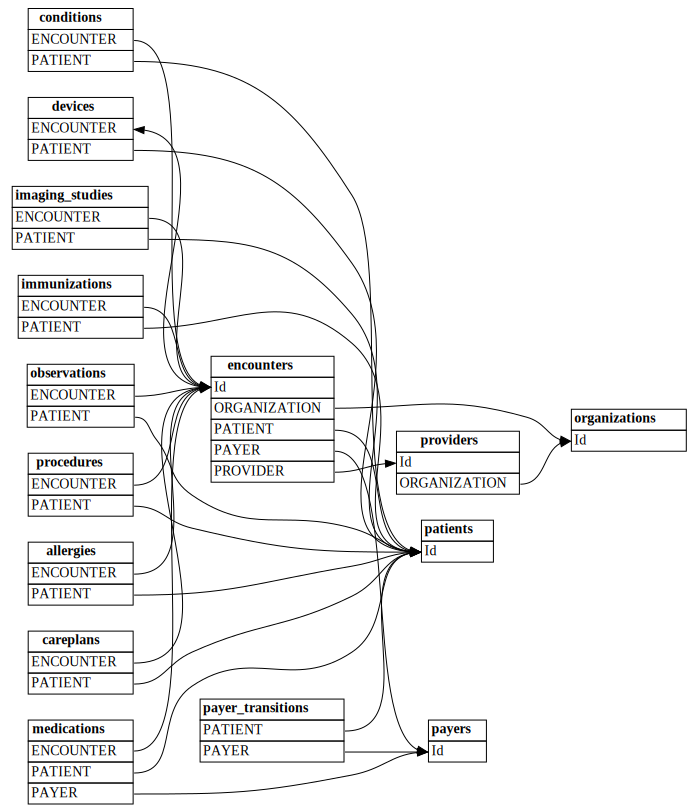

In [22]:
plot_relationship_metadata(suggested_relationships)

Count how many new "m:m" relationships we will discover with ``include_many_to_many=True`` (these will be in addition to the previously shown "m:1" relationships, so we will do filtering on ``multiplicity``):

In [26]:
suggested_relationships = find_relationships(all_tables, coverage_threshold=1.0, include_many_to_many=True) 
suggested_relationships[suggested_relationships['Multiplicity']=='m:m']

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 33, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To
0,m:m,allergies,PATIENT,careplans,PATIENT,1.0,0.133776,0,0,141,1054,597,3483
1,m:m,allergies,PATIENT,conditions,PATIENT,1.0,0.122396,0,0,141,1152,597,8376
2,m:m,allergies,PATIENT,encounters,PATIENT,1.0,0.120410,0,0,141,1171,597,53346
4,m:m,allergies,PATIENT,immunizations,PATIENT,1.0,0.120616,0,0,141,1169,597,15478
5,m:m,allergies,PATIENT,medications,PATIENT,1.0,0.127371,0,0,141,1107,597,42989
6,m:m,allergies,PATIENT,observations,PATIENT,1.0,0.120410,0,0,141,1171,597,299697
8,m:m,careplans,PATIENT,conditions,PATIENT,1.0,0.914931,0,0,1054,1152,3483,8376
9,m:m,careplans,PATIENT,encounters,PATIENT,1.0,0.900085,0,0,1054,1171,3483,53346
11,m:m,imaging_studies,PATIENT,careplans,PATIENT,1.0,0.234345,0,0,247,1054,855,3483
12,m:m,careplans,PATIENT,immunizations,PATIENT,1.0,0.901625,0,0,1054,1169,3483,15478


You can sort the relationship data by various columns to gain a deeper understanding of their nature. For example, you could choose to order the output by ``'Row Count From'`` and ``'Row Count To'``, which will help identify the largest tables. In a different dataset, maybe it will be inportant to focus on number of nulls 'n_nulls_from' or 'coverage_to'.

This analysis can help understand if any of the relationships could be invalid, and if you need to remove them from the list of candidates.

In [34]:
suggested_relationships.sort_values(['Row Count From', 'Row Count To'], ascending=False)

StatementMeta(, f6d37edc-863a-452c-b8b8-58f93c2c1ef0, 41, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Coverage From,Coverage To,Null Count From,Null Count To,Unique Count From,Unique Count To,Row Count From,Row Count To
35,m:1,observations,ENCOUNTER,encounters,Id,1.0,0.375473,30363,0,20030,53346,299697,53346
36,m:m,observations,PATIENT,encounters,PATIENT,1.0,1.000000,0,0,1171,1171,299697,53346
60,m:1,observations,PATIENT,patients,Id,1.0,1.000000,0,0,1171,1171,299697,1171
37,m:m,encounters,PATIENT,observations,PATIENT,1.0,1.000000,0,0,1171,1171,53346,299697
34,m:m,encounters,PAYER,medications,PAYER,1.0,1.000000,0,0,10,10,53346,42989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1:1,devices,ENCOUNTER,encounters,Id,1.0,0.001462,0,0,78,53346,78,53346
26,m:m,devices,PATIENT,procedures,PATIENT,1.0,0.063519,0,0,74,1165,78,34981
23,m:m,devices,PATIENT,immunizations,PATIENT,1.0,0.063302,0,0,74,1169,78,15478
15,m:m,devices,PATIENT,conditions,PATIENT,1.0,0.064236,0,0,74,1152,78,8376


## Next step

Try using the learned ways of detecting data quality issues on your data and get amazed with the discoveries!

## Related content

Check out other tutorials for Semantic Link / SemPy:
1. Clean Data with Functional Dependencies
1. Discover Relationships in a PowerBI Dataset Using Semantic Link
1. Analyze functional dependencies in a Power BI sample dataset
1. Extract and Calculate PowerBI Measures from Jupyter Notebook